# Project: TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

Columns found in the dataset: id, imbd_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
> Which genre is the most popular for all the release years?

In [1]:
#import various packages needed for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.0MB/s eta 0:00:01   91% |█████████████████████████████▍  | 9.6MB 28.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.9MB/s eta 0:00:01   70% |██████████████████████▍         | 9.4MB 26.3MB/s eta 0:00:01    79% |█████████████████████████▌      | 10.6MB 25.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


In [2]:
#Load the dataset into the workspace for use
df_movie = pd.read_csv('tmdb-movies.csv')

In [3]:
#Use the head() function to determine if the dataset has been loaded.
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Use the info() function to check for total number of rows and columns, datatypes and whether the dataset has missing values.
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [ ]:
#Total columns: 21, Total rows: 10866

In [5]:
df_movie.shape

(10866, 21)

In [6]:
#This function gives out the mean, median, standard deviation, total count of entries in the dataset, 
#the 25th and 75th percentile and the min and max numbers.
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


In [7]:
#Columns dropped: original_title, cast, homepage, tagline, keywords, overview.
#Reason: The columns are not necessary to the question asked.
df_movie.drop(['original_title','cast','homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [8]:
#check if the columns have been dropped
df_movie.head()

,id,imdb_id,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [ ]:
#After columns dropped, new total columns: 15

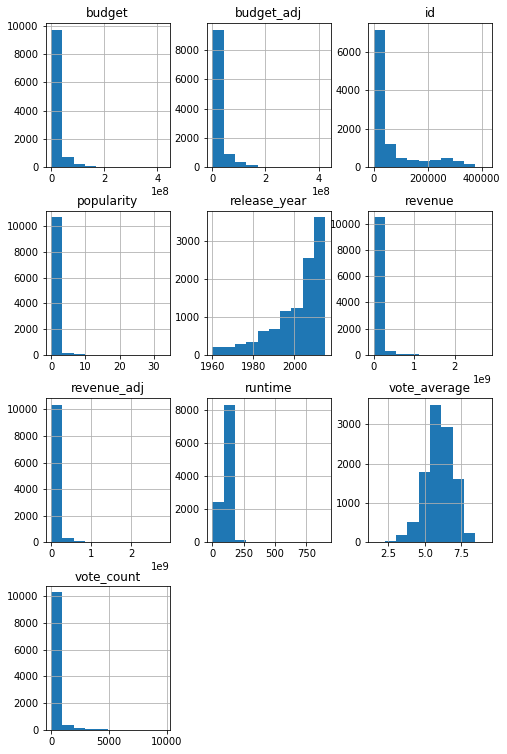

In [10]:
df_movie.hist(figsize=(8,13));

The above histograms are the histograms of the columns with numbers. release_year column is the one that is most skewed to the right.

In [11]:
#checking for the total number of missing values in the director column...
df_movie['director'].isna().sum()

44

In [12]:
#drop rows that have missing values
df_movie[df_movie.director.isnull()]
df_movie.dropna(inplace=True)

In [13]:
#checking if the missing values have been dropped with the info() function
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 10865
Data columns (total 15 columns):
id                      9805 non-null int64
imdb_id                 9805 non-null object
popularity              9805 non-null float64
budget                  9805 non-null int64
revenue                 9805 non-null int64
director                9805 non-null object
runtime                 9805 non-null int64
genres                  9805 non-null object
production_companies    9805 non-null object
release_date            9805 non-null object
vote_count              9805 non-null int64
vote_average            9805 non-null float64
release_year            9805 non-null int64
budget_adj              9805 non-null float64
revenue_adj             9805 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [ ]:
#After the rows with missing values are dropped, the dataset does not have any rows with missing values.

#Total columns: 15, Total rows: 9805

In [14]:
#this removes unnecessary spaces and replaces any column name that is in uppercase to lowercase
df_movie.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

In [15]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 10865
Data columns (total 15 columns):
id                      9805 non-null int64
imdb_id                 9805 non-null object
popularity              9805 non-null float64
budget                  9805 non-null int64
revenue                 9805 non-null int64
director                9805 non-null object
runtime                 9805 non-null int64
genres                  9805 non-null object
production_companies    9805 non-null object
release_date            9805 non-null object
vote_count              9805 non-null int64
vote_average            9805 non-null float64
release_year            9805 non-null int64
budget_adj              9805 non-null float64
revenue_adj             9805 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [16]:
#checking for the invalid values in the budget column
df_movie.budget.isin([0]).sum()

4775

In [17]:
#checking for the invalid values in the revenue column
df_movie.revenue.isin([0]).sum()

5052

In [18]:
#Calculating the mean of the budget column
means_budget = df_movie.budget.mean()
means_budget

16129951.172667006

In [19]:
#Replacing the zeros in the budget column with the mean
df_movie['budget'] = df_movie['budget'].replace(0,means_budget)

In [20]:
#The result shows that there are no zero values again
df_movie.budget.isin([0]).sum()

0

In [21]:
#Calculating the mean of the revenue column
means_revenue = df_movie.revenue.mean()
means_revenue

44082443.612034678

In [22]:
#Replacing the zeros in the revenue column with the mean
df_movie['revenue'] = df_movie['revenue'].replace(0,means_revenue)

In [23]:
#The result shows that there are no zero values again
df_movie.budget.isin([0]).sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Question: Which genre is the most popular for all the release years?

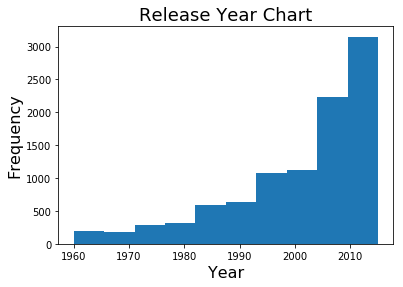

In [31]:
#Plotting the release year column histogram chart to determine the frequency of movies per year
df_movie['release_year'].plot(kind='hist');
plt.title('Release Year Chart', fontsize=18);
plt.xlabel('Year', fontsize=16);
plt.ylabel('Frequency', fontsize=16);

The histogram generated for the release year column tells us that the highest frequency of movies were released from 2010 up and this can aid in determing the most popular genre in all the years provided in the dataset. 

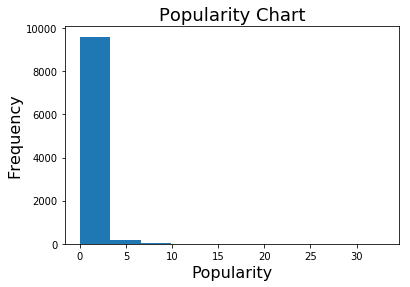

In [32]:
#Plotting the popularity column histogram chart to determine how popular movies were visually
df_movie['popularity'].plot(kind='hist');
plt.title('Popularity Chart', fontsize=18);
plt.xlabel('Popularity', fontsize=16);
plt.ylabel('Frequency', fontsize=16);

The histogram above shows that movies were decreasing in popularity.

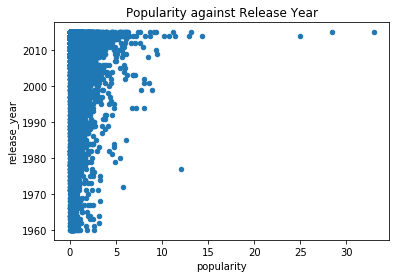

In [33]:
#Scatter plot of popularity against release year
df_movie.plot(x='popularity', y='release_year', kind='scatter', title='Popularity against Release Year');

In [34]:
#Grouping the release year and genres columns and finding the mean with the popularity column
df_movie.groupby(['release_year', 'genres'], as_index=False)['popularity'].mean()

,release_year,genres,popularity
0,1960,Action|Adventure|Drama|History|Western,0.310398
1,1960,Action|Adventure|Western,1.872132
2,1960,Action|Drama|Foreign|History|War,0.194948
3,1960,Action|Drama|History,1.136943
4,1960,Action|Drama|History|War,0.256779
5,1960,Action|Drama|Romance|Western,0.266435
6,1960,Action|Drama|Western,0.421043
7,1960,Action|Western,0.267118
8,1960,Adventure|Family,0.465879
9,1960,Adventure|Fantasy|Science Fiction,0.144106


In [35]:
#Using the max() function with the mean() with the grouped columns (release_year and genres) and popularity columns
#to determine the most popular genre(s) in all the years
df_movie.groupby(['release_year', 'genres'], as_index=False)['popularity'].mean().max()

release_year                2015
genres          Western|Thriller
popularity               30.7028
dtype: object

<a id='conclusions'></a>
## Conclusions

From the scatter plot of the popularity and release year, it can be shown that some movie genres were most popular from year 2010 up.

After using the groupby pandas function, it was determined that Western | Thriller genres had the highest popularity in all the release years. It was also determined that a lot of movies were released in the year 2015.

<a id='Limitation'></a>
## Limitation

The rows in the genres column had more than one item in them.

## Submitting your Project 

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0